# Información del conjunto de datos

Conjunto de datos: [The Price and Sales of Avocado](https://www.kaggle.com/datasets/alanluo418/avocado-prices-20152019)

Son datos descargados en enero del 2020 y provienen del sitio web de [Hass Avocado Board](https://hassavocadoboard.com/) . Muestran información semanal de volumen y precio minorista nacional en EE. UU. 


### Campos
* Fecha - La fecha de la observación
* AveragePrice - el precio medio de un aguacate
* Tipo - convencional o ecológico
* Año - el año
* Región - la ciudad o región de la observación
* Total Volume - Número total de aguacates vendidos
* 4046 - Número total de aguacates con PLU 4046 vendidos
* 4225 - Número total de aguacates con PLU 4225 vendidos
* 4770 - Número total de aguacates con PLU 4770 vendidos


**Objetivo:** Predecir el precio de venta promedio de un aguacate

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Avocado.csv')
display(df.head())
display(df.info())

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany
4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27323 entries, 0 to 27322
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          27323 non-null  object 
 1   AveragePrice  27323 non-null  float64
 2   Total Volume  27323 non-null  float64
 3   4046          27323 non-null  float64
 4   4225          27323 non-null  float64
 5   4770          27323 non-null  float64
 6   Total Bags    27323 non-null  float64
 7   Small Bags    27323 non-null  float64
 8   Large Bags    27323 non-null  float64
 9   XLarge Bags   27323 non-null  float64
 10  type          27323 non-null  object 
 11  year          27323 non-null  int64  
 12  region        27323 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.7+ MB


None

No se observa ningun valor nulo.

# Analisis de una variable

In [7]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,27323.000000,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,27323.000000,27323.000000
mean,1.400632,9.135469e+05,2.953187e+05,2.901059e+05,2.215868e+04,3.058740e+05,2.186982e+05,8.202537e+04,5150.387571,2016.956593
std,0.385439,3.702672e+06,1.273010e+06,1.187227e+06,1.031329e+05,1.274851e+06,8.881292e+05,3.917356e+05,30719.207766,1.406539
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.110000,1.361412e+04,7.964250e+02,2.922980e+03,0.000000e+00,7.703605e+03,5.283050e+03,2.773700e+02,0.000000,2016.000000
50%,1.370000,1.198654e+05,1.003785e+04,2.568849e+04,1.926900e+02,4.775039e+04,3.223150e+04,4.312490e+03,0.000000,2017.000000
75%,1.640000,4.747205e+05,1.133179e+05,1.454464e+05,5.898300e+03,1.461021e+05,1.048424e+05,3.268494e+04,450.665000,2018.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,2.347299e+07,1.543625e+07,8.378356e+06,844929.830000,2019.000000


/home/uno/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/uno/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/uno/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'Baltimore/Washington'),
  Text(3, 0, 'BaltimoreWashington'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'Boston'),
  Text(6, 0, 'Buffalo/Rochester'),
  Text(7, 0, 'BuffaloRochester'),
  Text(8, 0, 'California'),
  Text(9, 0, 'Charlotte'),
  Text(10, 0, 'Chicago'),
  Text(11, 0, 'Cincinnati/Dayton'),
  Text(12, 0, 'CincinnatiDayton'),
  Text(13, 0, 'Columbus'),
  Text(14, 0, 'Dallas/Ft. Worth'),
  Text(15, 0, 'DallasFtWorth'),
  Text(16, 0, 'Denver'),
  Text(17, 0, 'Detroit'),
  Text(18, 0, 'Grand Rapids'),
  Text(19, 0, 'GrandRapids'),
  Text(20, 0, 'Great Lakes'),
  Text(21, 0, 'Gre

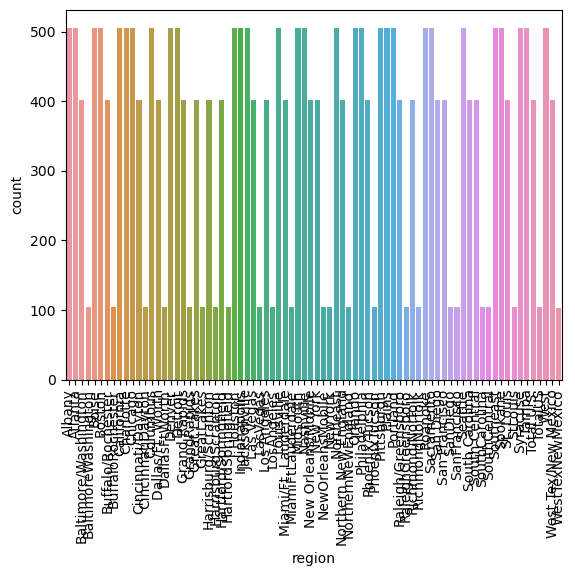

In [24]:
df['region'].unique()
sns.countplot(x='region',data=df)


<Axes: xlabel='year', ylabel='count'>

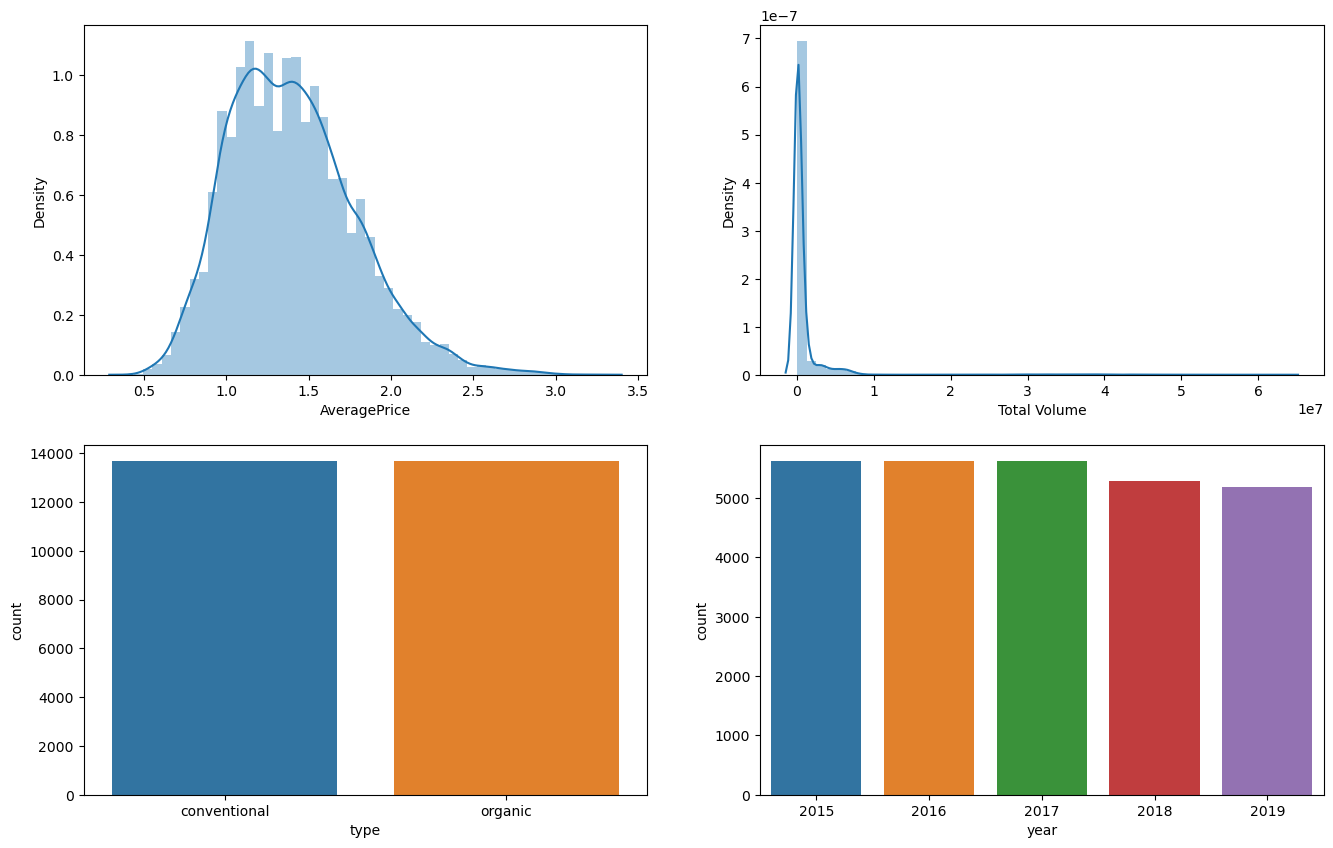

In [59]:
import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
sns.distplot(df['AveragePrice'], kde=True,ax=axes[0,0])
sns.distplot(df['Total Volume'], kde=True, ax=axes[0,1])
sns.countplot(x='type',data=df,ax=axes[1,0])
sns.countplot(x='year',data=df,ax=axes[1,1])


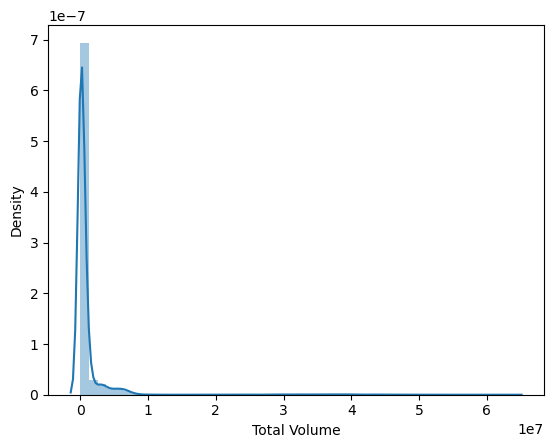

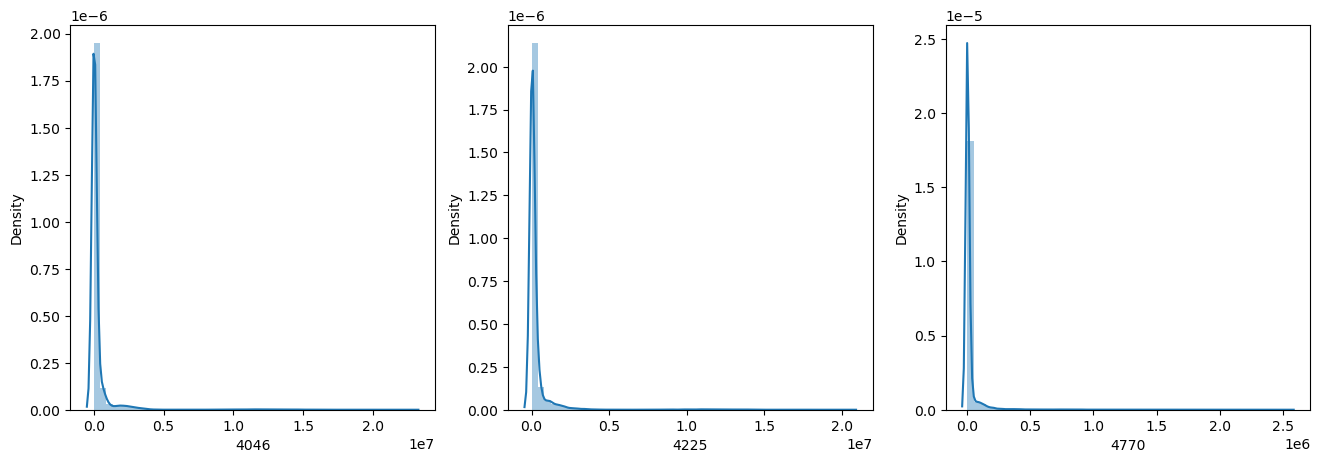

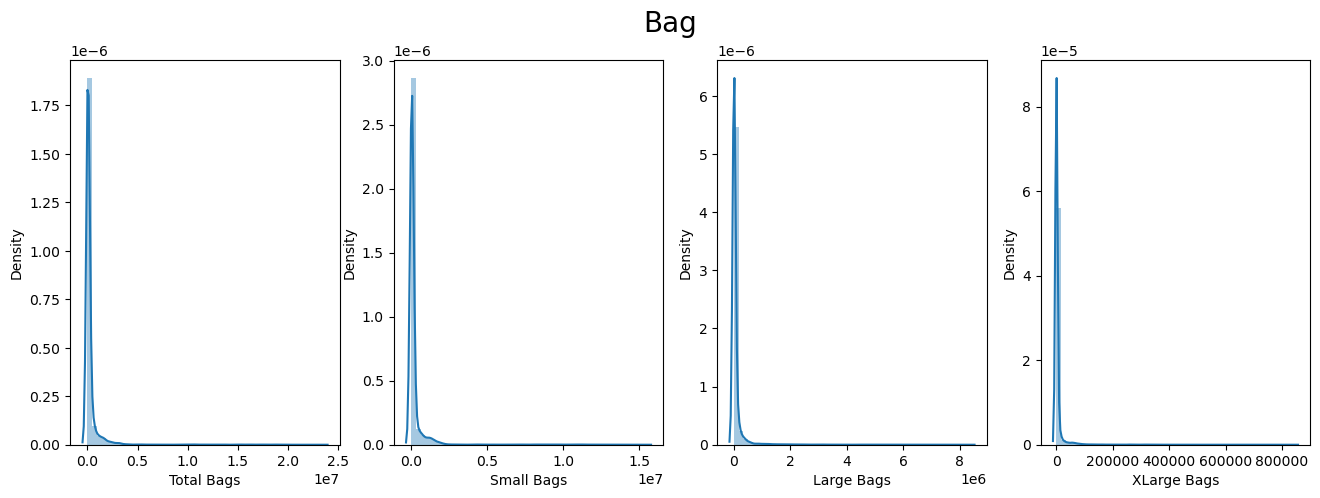

In [135]:
import warnings
warnings.filterwarnings("ignore")

sns.distplot(df['Total Volume'], kde=True)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.distplot(df['4046'], kde=True,ax=axes[0])
sns.distplot(df['4225'], kde=True, ax=axes[1])
sns.distplot(df['4770'], kde=True, ax=axes[2])

fig, axes = plt.subplots(1, 4, figsize=(16, 5))
sns.distplot(df['Total Bags'], kde=True,ax=axes[0])
sns.distplot(df['Small Bags'], kde=True, ax=axes[1])
sns.distplot(df['Large Bags'], kde=True, ax=axes[2])
sns.distplot(df['XLarge Bags'], kde=True, ax=axes[3])
fig.suptitle('Bag', fontsize=20)
plt.show()


LA distribucion de las variables es igual.

## Análisis bivariado

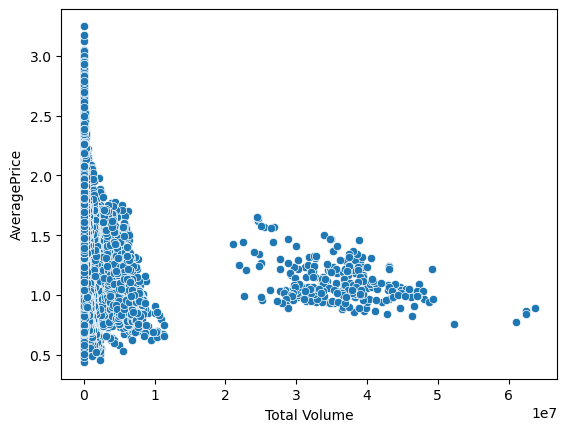

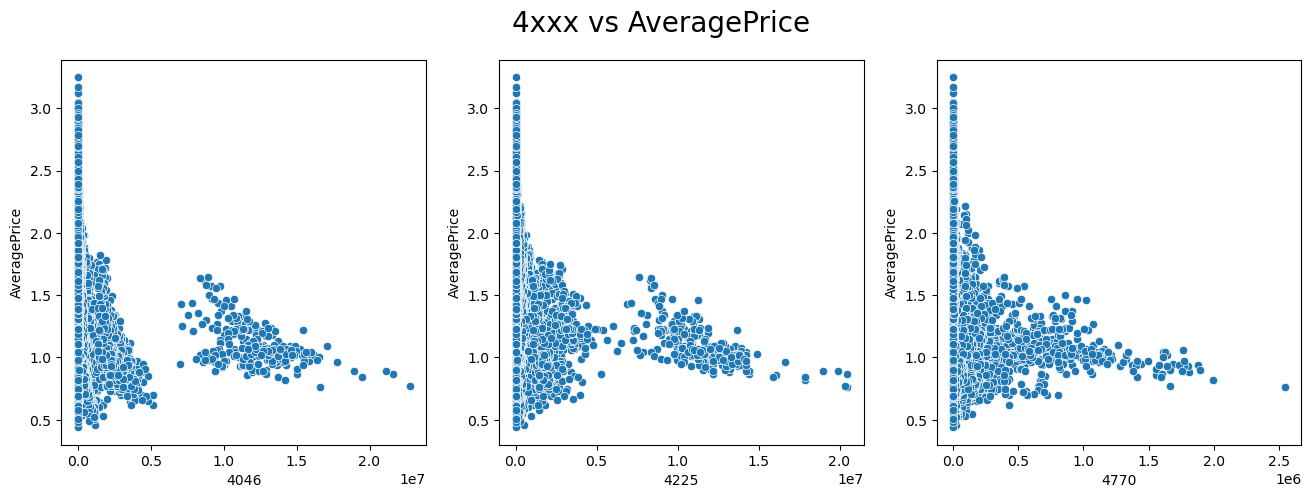

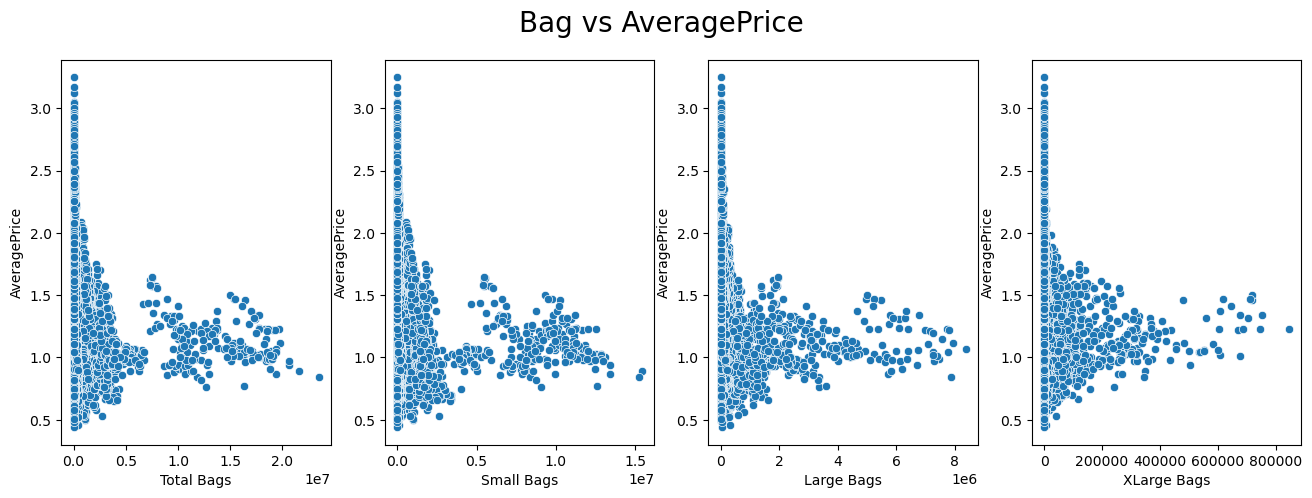

In [136]:
import warnings
warnings.filterwarnings("ignore")

sns.scatterplot(x="Total Volume", y="AveragePrice", data=df) 

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.scatterplot(x="4046", y="AveragePrice", data=df, ax=axes[0])
sns.scatterplot(x="4225", y="AveragePrice", data=df, ax=axes[1])
sns.scatterplot(x="4770", y="AveragePrice", data=df, ax=axes[2])
fig.suptitle('4xxx vs AveragePrice', fontsize=20)
plt.show()

fig, axes = plt.subplots(1, 4, figsize=(16, 5))
sns.scatterplot(x="Total Bags", y="AveragePrice", data=df,ax=axes[0])
sns.scatterplot(x="Small Bags", y="AveragePrice", data=df,ax=axes[1])
sns.scatterplot(x="Large Bags", y="AveragePrice", data=df,ax=axes[2])
sns.scatterplot(x="XLarge Bags", y="AveragePrice", data=df,ax=axes[3])
fig.suptitle('Bag vs AveragePrice', fontsize=20)
plt.show()

En las unicas variaables que se alcanza a ver una relacion parcial lineal es con 'Total Volume' para valores despues de 20.000.000

## type, year y Total Volume

In [86]:
display(df['type'].value_counts())
display(df['year'].value_counts())


type
conventional    13662
organic         13661
Name: count, dtype: int64

year
2016    5616
2017    5616
2015    5615
2018    5292
2019    5184
Name: count, dtype: int64

2015
2016
2017
2018
2019


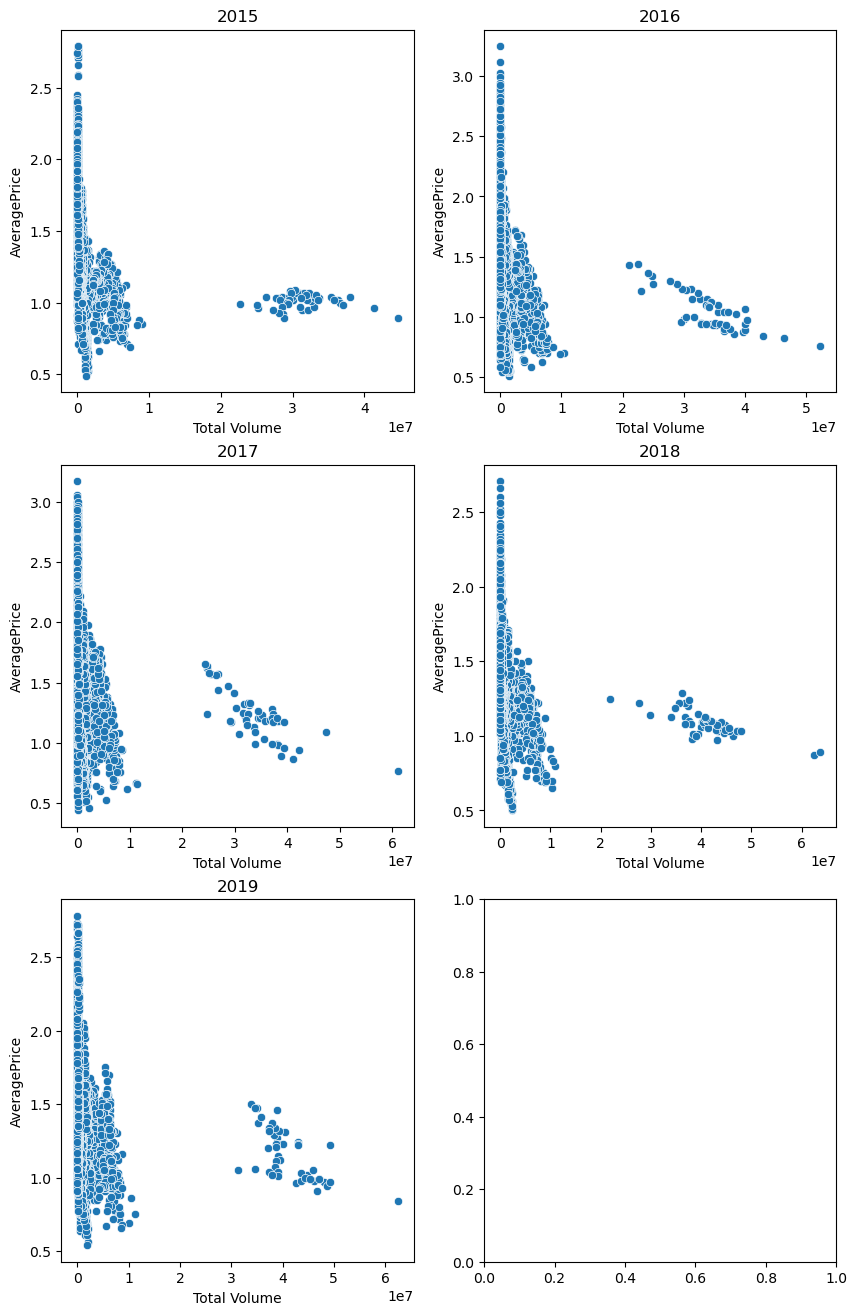

In [157]:
fig, axes = plt.subplots(3, 2, figsize=(10, 16))

for agno in range(2015,2020):
    print(agno)
    df_t = df[df['year']==agno]
    pos_r = (agno-2015)//2
    pos_c = (agno-2015)%2
    sns.scatterplot(x="Total Volume", y="AveragePrice", data=df_t, ax=axes[pos_r,pos_c]).set(title = agno)

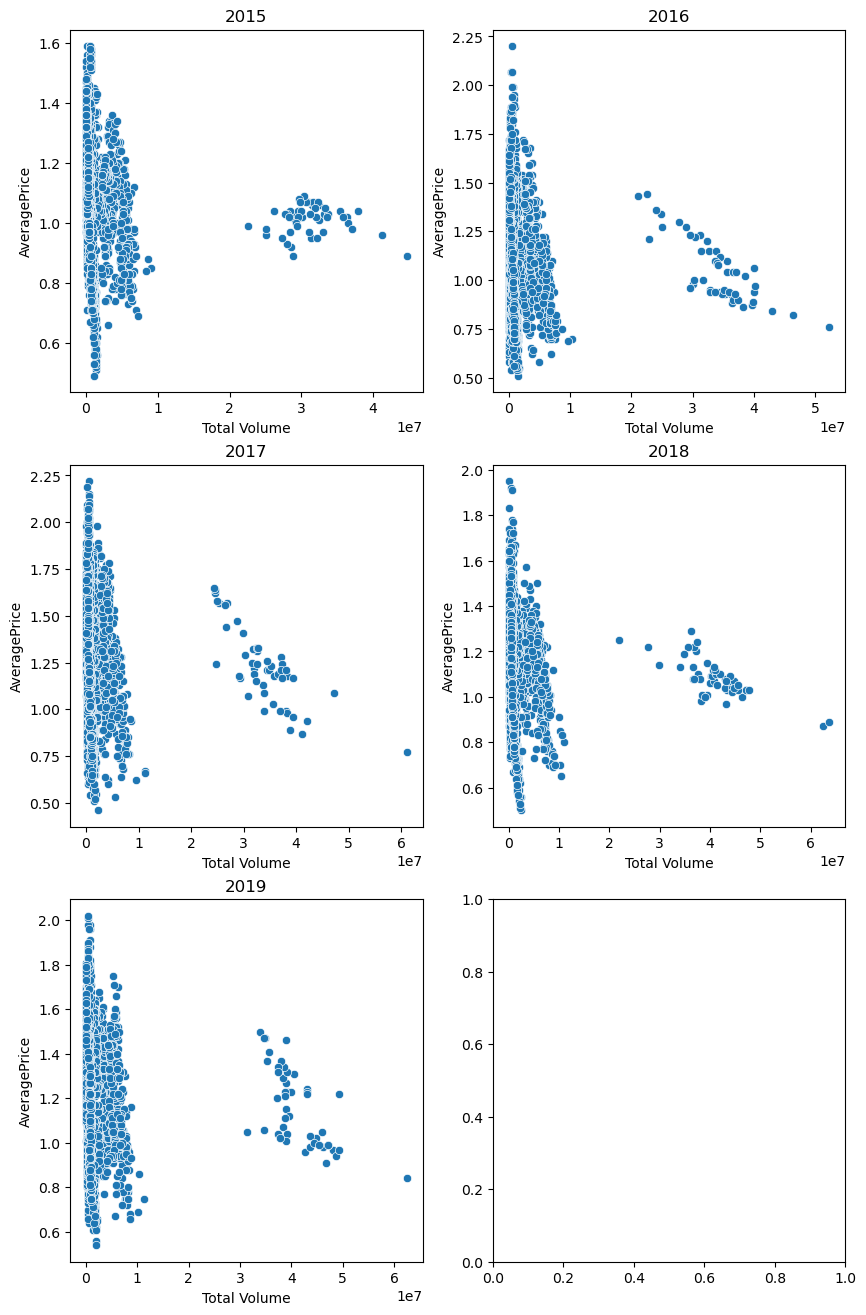

In [159]:
fig, axes = plt.subplots(3, 2, figsize=(10, 16))

for agno in range(2015,2020):
    df_t = df[(df['type']=="conventional") & (df['year']==agno)]
    pos_r = (agno-2015)//2
    pos_c = (agno-2015)%2
    sns.scatterplot(x="Total Volume", y="AveragePrice", data=df_t, ax=axes[pos_r,pos_c]).set(title = agno)

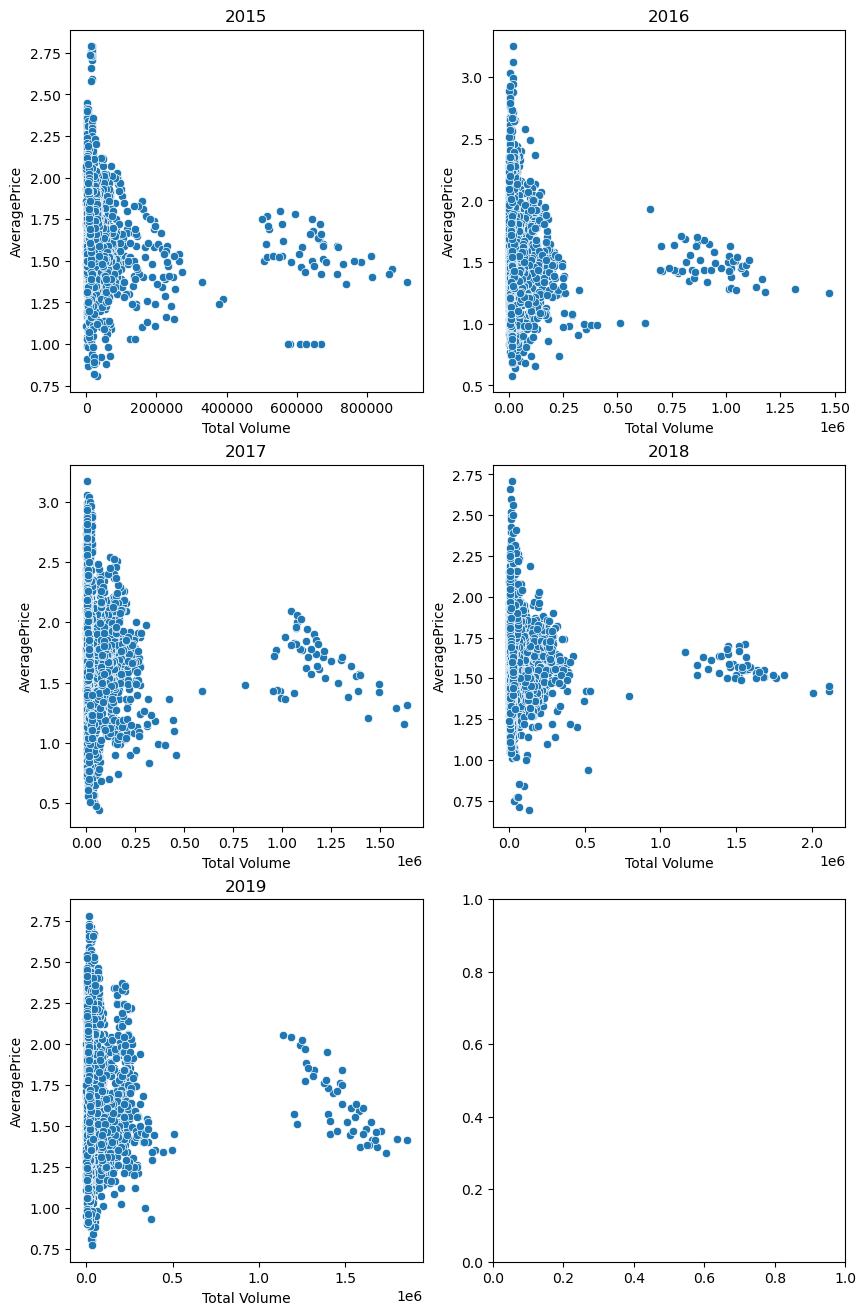

In [160]:
fig, axes = plt.subplots(3, 2, figsize=(10, 16))

for agno in range(2015,2020):
    df_t = df[(df['type']=="organic") & (df['year']==agno)]
    pos_r = (agno-2015)//2
    pos_c = (agno-2015)%2
    sns.scatterplot(x="Total Volume", y="AveragePrice", data=df_t, ax=axes[pos_r,pos_c]).set(title = agno)

In [177]:
#2016 y 2027
#agno=2017
#df[["AveragePrice","Total Volume"]][(df['type']=="conventional") & (df['year']==agno) & (df['Total Volume']>1.5*10**7)].reset_index(drop=True).sort_values(by="Total Volume")

,AveragePrice,Total Volume
3,1.65,24397166.19
2,1.64,24610645.21
1,1.62,24637148.38
47,1.24,24686675.00
41,1.58,25031589.09
0,1.57,25394902.82
40,1.56,26385081.36
42,1.44,26706971.51
39,1.57,26808410.65
38,1.47,28785279.75


## Regresión Lineal

In [230]:
#from scipy.stats import pearsonr
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score
#from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
#import statsmodels.formula.api as smf

In [233]:
df_t = df[["AveragePrice","Total Volume"]][(df['type']=="conventional") & (df['year']==2017) & (df['Total Volume']>1.5*10**7)].reset_index(drop=True)
df_t['Total Volume'] = df_t['Total Volume']/(10**7)
v_independiente = df_t['Total Volume']
v_dependiente = df_t['AveragePrice']



X_train, X_test, y_train, y_test = train_test_split(
                                        v_independiente.values.reshape(-1,1),
                                        v_dependiente.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


# Creación del modelo
# ==============================================================================
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

X_test = sm.add_constant(X_test)
predictions = modelo.predict(X_test) 



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     65.40
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           7.24e-10
Time:                        15:02:40   Log-Likelihood:                 28.488
No. Observations:                  41   AIC:                            -52.98
Df Residuals:                      39   BIC:                            -49.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0342      0.100     20.366      0.0

In [262]:
print("Pred, Real, Error")
for i in range(len(predictions)):
    error = abs(predictions[i]-y_test[i][0])
    print("%.2f"%predictions[i], y_test[i][0],"%.2f"%error )

Pred, Real, Error
1.42 1.56 0.14
1.17 1.21 0.04
1.41 1.57 0.16
1.28 1.19 0.09
1.14 0.98 0.16
1.35 1.17 0.18
1.24 1.13 0.11
1.11 0.96 0.15
1.20 1.03 0.17
1.11 1.17 0.06
1.12 0.89 0.23


In [261]:
# Evaluar el modelo
from sklearn.metrics import mean_squared_error
import math

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, predictions)

# Calcular la raíz cuadrada del error cuadrático medio (RMSE)
rmse = math.sqrt(mse)

# Imprimir las métricas
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz Cuadrada del Error Cuadrático Medio (RMSE): {rmse}")

Error Cuadrático Medio (MSE): 0.021583796907455932
Raíz Cuadrada del Error Cuadrático Medio (RMSE): 0.14691425018511967


## Redes neuronales

In [ ]:
#!pip install tensorflow

In [181]:
'''Estas bibliotecas son muy utilizadas en el ámbito del aprendizaje automático y la inteligencia artificial. 
TensorFlow proporciona herramientas para construir y entrenar modelos de aprendizaje automático, 
mientras que NumPy ofrece funciones y operaciones eficientes para trabajar con matrices y realizar 
cálculos numéricos. '''

import tensorflow as tf #keras

In [180]:
df_t = df[["AveragePrice","Total Volume"]][(df['type']=="conventional") & (df['year']==2017)].reset_index(drop=True)
df_t['Total Volume'] = df_t['Total Volume']/(10**7)

In [182]:
# Crear una capa densa (fully connected)
# - 'units=1': La capa tiene un solo nodo, común en modelos de regresión lineal.
# - 'input_shape=[1]': La capa espera entradas unidimensionales.
capa = tf.keras.layers.Dense(units=1, input_shape=[1]) 

# Crear un modelo secuencial
# - Se pasa la capa creada anteriormente como único elemento en la lista.
modelo = tf.keras.Sequential([capa])

In [183]:
# Configurar el modelo para el entrenamiento
#Optimizador= Adam es un algoritmo de optimización que ajusta automáticamente la tasa de aprendizaje 
#durante el entrenamiento. La tasa de aprendizaje está configurada en 0.1
#Loss= Se establece la función de pérdida como el error cuadrático medio (residuales).
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [191]:
v_independiente = df_t['Total Volume']
v_dependiente = df_t['AveragePrice']

# Modelo Redes neuronales 1

Comenzando entrenamiento...
Modelo entrenado!
Variables internas del modelo
            peso                              sesgo
[array([[-0.07769433]], dtype=float32), array([1.3575468], dtype=float32)]


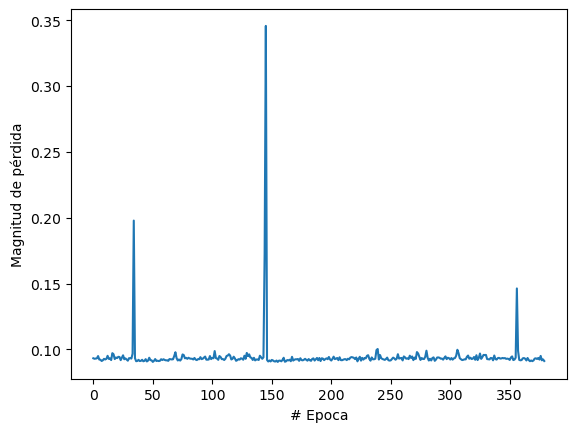

In [194]:
# Entrenar el modelo utilizando los datos de entrada 'v_independiente' y salida 'v_dependiente'
# - 'epochs=380': Número de veces que el modelo pasará por todos los datos de entrenamiento 
# durante el entrenamiento.
# - 'verbose=False': Desactiva la visualización de información detallada durante el entrenamiento.
print("Comenzando entrenamiento...")
historial = modelo.fit(v_independiente, v_dependiente, epochs=380, verbose=False)
print("Modelo entrenado!")

import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
# Graficar el historial de pérdida durante el entrenamiento
plt.plot(historial.history["loss"])

print("Variables internas del modelo")
print("            peso     " + "                         sesgo")
print(capa.get_weights())

In [9]:
print("Hagamos una predicción!")
resultado = modelo.predict([6.547629])
print("El resultado es " + str(resultado) + " muertos!")

Hagamos una predicción!
1/1 [==============================] - 0s 70ms/step
El resultado es [[174.98706]] muertos!


## Modelo Redes neuronales 2

Comenzando entrenamiento...
Modelo entrenado!


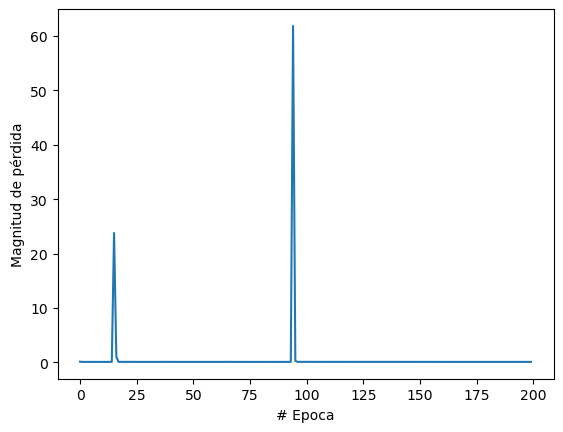

In [198]:
oculta1 = tf.keras.layers.Dense(units=15, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=15)
oculta3 = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, oculta3])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

print("Comenzando entrenamiento...")
historial = modelo.fit(v_independiente, v_dependiente, epochs=200, verbose=False)
print("Modelo entrenado!")

import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [15]:
print("Hagamos una predicción!")
# Realizar una predicción utilizando el modelo entrenado
resultado = modelo.predict([6.547629])
print("El resultado es " + str(resultado) + " muertos!")

Hagamos una predicción!
1/1 [==============================] - 0s 54ms/step
El resultado es [[179.1723]] muertos!


In [16]:
#Guardar el modelo en formato h5
modelo.save('murders.h5')

/home/uno/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Modelo Redes neuronales 3 (type = "conventional", year=2017, 'Total Volume'>1.5*10**7)

In [200]:
df_t = df[["AveragePrice","Total Volume"]][(df['type']=="conventional") & (df['year']==2017) & (df['Total Volume']>1.5*10**7)].reset_index(drop=True)
df_t['Total Volume'] = df_t['Total Volume']/(10**7)
v_independiente = df_t['Total Volume']
v_dependiente = df_t['AveragePrice']


Comenzando entrenamiento...
Modelo entrenado!
Hagamos una predicción!
    AveragePrice  Total Volume
20          1.18      3.572901
1/1 [==============================] - 0s 38ms/step
El resultado es [[1.1962639]] AveragePrice!


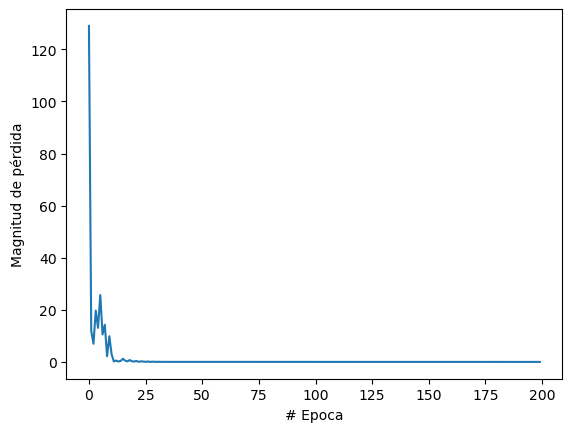

In [220]:
oculta1 = tf.keras.layers.Dense(units=30, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=30)
oculta3 = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, oculta3])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

print("Comenzando entrenamiento...")
historial = modelo.fit(v_independiente, v_dependiente, epochs=200, verbose=False)
print("Modelo entrenado!")

modelo.save('ModeloNN3.h5')

import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])


print("Hagamos una predicción!")
print( df_t[ (df_t['Total Volume'] > 3.57) &  (df_t['Total Volume'] < 3.58) ] )
# Realizar una predicción utilizando el modelo entrenado
resultado = modelo.predict([3.572901])
print("El resultado es " + str(resultado) + " AveragePrice!")

Puedes ajustar y utilizar otras métricas según tus necesidades específicas. Además, ten en cuenta que estas métricas son específicas para los datos de entrenamiento. Para una evaluación más completa, podrías dividir tus datos en conjuntos de entrenamiento y prueba y calcular las métricas en el conjunto de prueba para evaluar la generalización del modelo a datos no vistos.